In [ ]:
#importing necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#Importing data

In [ ]:
#importing data
Reddit = pd.read_csv("/content/Reddit_data.csv")
#getting first 5 rows
Reddit.head()

,Unnamed: 0,body,created_utc,ups,downs,upvote_ratio,score,gilded,over_18,number_of_Comments,author,archived,edited,link_id,url
0,0,The best parts of coming home after a long tri...,1.619603e+09,25691,0,0.95,25691,0,False,459,jp9544,False,False,n0b2db,https://i.redd.it/hpxcd7ecwvv61.jpg
1,1,What seems harmless but is incredibly dangerous?,1.619551e+09,54168,0,0.92,54168,1,False,26338,Crimtot,False,False,mzwd8x,https://www.reddit.com/r/AskReddit/comments/mz...
2,2,28 April 1945: Adolf Hitler briefly emerges fr...,1.619599e+09,22730,0,0.97,22730,0,False,1232,Vucea,False,False,n0ad6r,https://i.redd.it/cgd3gs8wmvv61.jpg
3,3,ELI5: Why can’t you spend dirty money like reg...,1.619542e+09,19549,0,0.92,19549,0,False,4915,courtimus-prime,False,False,mzsrmj,https://www.reddit.com/r/explainlikeimfive/com...
4,4,please mothre,1.619602e+09,19090,0,0.87,19090,0,False,570,m33gs,False,False,n0b1tb,https://v.redd.it/pdn7pl14wvv61


#Exploring the data

In [ ]:
Reddit.columns

Index(['Unnamed: 0', 'body', 'created_utc', 'ups', 'downs', 'upvote_ratio',
       'score', 'gilded', 'over_18', 'number_of_Comments', 'author',
       'archived', 'edited', 'link_id', 'url'],
      dtype='object')

In [ ]:
Reddit.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
Reddit.tail()

,body,created_utc,ups,downs,upvote_ratio,score,gilded,over_18,number_of_Comments,author,archived,edited,link_id,url
7363,"*cries in quadratic formula*....No seriously, ...",1.619608e+09,77,0,0.89,77,0,False,6,Stripe73,False,False,n0c868,https://i.redd.it/7hqu5b34bwv61.png
7364,True Dat,1.619614e+09,75,0,0.96,75,0,False,5,SenTry_WarLock11,False,False,n0e4ay,https://i.redd.it/es6b492hvwv61.jpg
7365,Don’t worry guys she’ll be back with the milk ...,1.619606e+09,83,0,0.97,83,0,False,4,SkyBeres,False,False,n0bsh0,https://i.redd.it/olhxc2ki5wv61.jpg
7366,Literally 17y/o me,1.619611e+09,64,0,0.97,64,0,False,5,TahsinTheBangladeshi,False,False,n0d2ka,https://i.redd.it/8hrpcgzqkwv61.jpg
7367,Enemy in the AO!,1.619612e+09,59,0,0.95,59,0,False,2,lebrian,False,False,n0djo3,https://i.redd.it/s6cdoxhopwv61.jpg


In [ ]:
Reddit.describe()

,created_utc,ups,downs,upvote_ratio,score,gilded,number_of_Comments
count,7.368000e+03,7368.000000,7368.0,7368.000000,7368.000000,7368.000000,7368.000000
mean,1.619581e+09,3207.049946,0.0,0.970228,3207.049946,0.043567,87.830619
std,2.181565e+04,8364.217594,0.0,0.033743,8364.217594,0.275957,391.696711
min,1.619530e+09,56.000000,0.0,0.620000,56.000000,0.000000,0.000000
25%,1.619565e+09,250.000000,0.0,0.960000,250.000000,0.000000,10.000000
50%,1.619585e+09,674.500000,0.0,0.980000,674.500000,0.000000,25.000000
75%,1.619600e+09,2322.500000,0.0,0.990000,2322.500000,0.000000,71.000000
max,1.619615e+09,141697.000000,0.0,1.000000,141697.000000,8.000000,26338.000000


#Missing values

In [ ]:
Reddit.isnull().sum()

body                  0
created_utc           0
ups                   0
downs                 0
upvote_ratio          0
score                 0
gilded                0
over_18               0
number_of_Comments    0
author                1
archived              0
edited                0
link_id               0
url                   0
dtype: int64

In [ ]:
Reddit.drop(['author'], axis=1, inplace=True)

In [ ]:
Reddit.drop(['body'], axis=1, inplace=True)

In [ ]:
Reddit.drop(['over_18'], axis=1, inplace=True)

In [ ]:
#Exploring each variable 

In [ ]:
Reddit['gilded'].value_counts()

0    7112
1     216
2      30
3       5
5       2
8       2
4       1
Name: gilded, dtype: int64

In [ ]:
Reddit['over_18'].value_counts()

False    7290
True       78
Name: over_18, dtype: int64

In [ ]:
Reddit['link_id'].value_counts().head()

n0a7h6    1
n06a51    1
mzvcve    1
n03cz9    1
n0cnvm    1
Name: link_id, dtype: int64

In [ ]:
#Convert created_utc to datetime
from datetime import datetime
Reddit["created_utc"] = pd.to_datetime(Reddit['created_utc'], unit='s')

In [ ]:
#Preliminaries

In [ ]:
print( "Upvotes mean: %0.2f" % (np.mean(Reddit['ups'])))
print( "Upvotes median: %0.2f" % (np.median(Reddit['ups'])))
print( "Upvotes standard deviation: %0.2f" % (np.std(Reddit['ups'])))

Upvotes mean: 3207.05
Upvotes median: 674.50
Upvotes standard deviation: 8363.65


In [ ]:
print( "Gilded mean: %0.2f" % (np.mean(Reddit['gilded'])))
print( "Gilded median: %0.2f" % (np.median(Reddit['gilded'])))
print( "Gilded standard deviation: %0.2f" % (np.std(Reddit['gilded'])))

Gilded mean: 0.04
Gilded median: 0.00
Gilded standard deviation: 0.28


#Visualisation

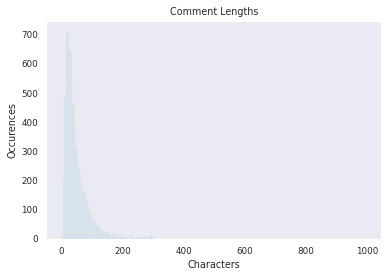

In [ ]:
sns.set_style("darkgrid")
sns.set_context("paper")
Reddit['character_count'] = Reddit['body'].map(lambda x : len(x))
plt.hist(Reddit['character_count'], bins=np.arange(1,1000,5), alpha=0.1, label="Character Lengths");
plt.title('Comment Lengths');
plt.xlabel('Characters');
plt.ylabel('Occurences');
plt.grid(False);

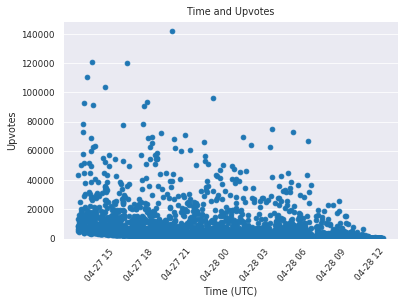

In [ ]:
plt.scatter(Reddit['created_utc'], Reddit['ups']);
plt.title('Time and Upvotes');
plt.xlabel('Time (UTC)');
plt.xticks(rotation = 50)
plt.ylabel('Upvotes');
plt.ylim(ymin=-0.2);
ax = plt.gca();
ax.xaxis.grid(False)

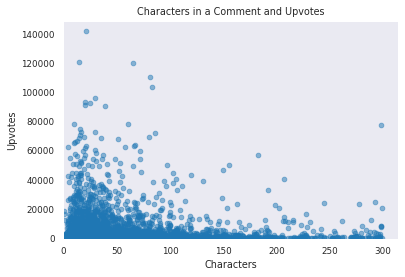

In [ ]:
plt.scatter(Reddit['character_count'], Reddit['ups'], alpha=0.5);
plt.ylim(ymin=-0.2);
plt.xlim(xmin=-0.2);
plt.title('Characters in a Comment and Upvotes');
plt.xlabel('Characters');
plt.ylabel('Upvotes');
plt.grid(False)

# Data preprocessing

In [ ]:
! pip install vaderSentiment

     |████████████████████████████████| 133kB 7.0MB/s 


In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
! pip install nltk

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def text_preprocess(text):
    text = re.sub(r'[^\w\s]', '', text) 
    l_text = [word for word in text.lower().split() if word not in ENGLISH_STOP_WORDS]
    stem_words = [stemmer.stem(w) for w in l_text]
    lemma_words = [lemmatizer.lemmatize(w) for w in l_text]

    return " ".join(lemma_words)

Reddit['body'] = Reddit['body'].map(lambda com : text_preprocess(com))

In [ ]:
Reddit.head().T

,0,1,2,3,4
body,best part coming home long trip starter pack,harmless incredibly dangerous,28 april 1945 adolf hitler briefly emerges bun...,eli5 spend dirty money like regular untraceabl...,mothre
created_utc,2021-04-28 09:35:50,2021-04-27 19:23:51,2021-04-28 08:42:44,2021-04-27 16:47:05,2021-04-28 09:34:42
ups,25691,54168,22730,19549,19090
downs,0,0,0,0,0
upvote_ratio,0.95,0.92,0.97,0.92,0.87
score,25691,54168,22730,19549,19090
gilded,0,1,0,0,0
over_18,False,False,False,False,False
number_of_Comments,459,26338,1232,4915,570
archived,False,False,False,False,False


In [ ]:
Reddit.drop(['created_utc','ups','archived','edited','link_id','url','character_count'], axis=1, inplace=True)

In [ ]:
Reddit.columns

Index(['downs', 'upvote_ratio', 'score', 'gilded', 'number_of_Comments'], dtype='object')

In [ ]:
X= Reddit.drop(['score'], axis=1)
y = Reddit['score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape , X_test.shape

((5157, 4), (2211, 4))

#Modelling

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import  AdaBoostRegressor
import xgboost as xgb
import lightgbm as lgbm

import sklearn.model_selection as model_selection
import pickle

In [ ]:
def model_diagnostics(model):
    train_pred = model.predict(X_train)
    r2 = r2_score(y_train, train_pred)
    mse = mean_squared_error(y_train, train_pred)
    mae = mean_absolute_error(y_train, train_pred)
    print(f"R-Sq of train data: {r2:.4}")
    print(f"RMSE of train data: {np.sqrt(mse)}")
    print(f"MAE  of train data: {mae}")
    print("*"*60)
    
    y_predicted = model.predict(X_test)
    r2 = r2_score(y_test, y_predicted)
    mse = mean_squared_error(y_test, y_predicted)
    mae = mean_absolute_error(y_test, y_predicted)
    print(f"R-Sq of test data: {r2:.4}")
    print(f"RMSE of test data: {np.sqrt(mse)}")
    print(f"MAE of test data: {mae}")
    
    return [r2,np.sqrt(mse),mae]  


model_metrics = dict()

In [ ]:
#Linear regression model

In [111]:
linearregression = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linearregression.fit(X_train,y_train)
model_metrics["Linear Regression"] = model_diagnostics(linearregression)

R-Sq of train data: 0.1959
RMSE of train data: 8048.541611782542
MAE  of train data: 3537.7570195669286
************************************************************
R-Sq of test data: 0.2244
RMSE of test data: 5911.94148100588
MAE of test data: 3100.350127896482


In [ ]:
#Decision Tree Model

In [ ]:
DecisionTree=model_selection.GridSearchCV(DecisionTreeRegressor(),param_grid=[{'max_depth':[2,3,4,5,6,7,None],
                                                                        "max_features":[1,2,3,4],
                                                                        "min_samples_split": np.arange(35,55,5),
                                                                        "min_samples_leaf": np.arange(35,55,5)}],cv=10)
DecisionTree.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, None],
                          'max_features': [1, 2, 3, 4],
                          'min_sa

In [ ]:
DecisionTree.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=35, min_samples_split=45,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
DecisionTree = DecisionTreeRegressor(max_depth=6, max_features=4,min_samples_split=50, min_samples_leaf=40, random_state = 10)
DecisionTree.fit(X_train, y_train)
model_metrics["Decision Tree"] = model_diagnostics(dt)

R-Sq of train data: 0.492
RMSE of train data: 6397.492242033351
MAE  of train data: 2510.1414837355064
************************************************************
R-Sq of test data: 0.3283
RMSE of test data: 5501.520883662116
MAE of test data: 2380.352050686469


In [ ]:
# Random forest model

In [97]:
RandomForest=model_selection.GridSearchCV(RandomForestRegressor(),param_grid=[{'min_samples_leaf': [1, 5,10],
                                                                         'min_samples_split': [ 5, 10],
                                                                         'n_estimators': [10,50,70]}])

In [100]:
RandomForest= RandomForestRegressor(n_jobs=-1, n_estimators=70, min_samples_leaf=10, random_state = 10)
RandomForest.fit(X_train, y_train) 
model_metrics["Random Forest"] = model_diagnostics(RandomForest)

R-Sq of train data: 0.5544
RMSE of train data: 5991.725369658446
MAE  of train data: 2332.863750174951
************************************************************
R-Sq of test data: 0.2913
RMSE of test data: 5651.099731506158
MAE of test data: 2389.9776499773234


In [ ]:
# KNeighbors model

In [112]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
KNN_model = KNeighborsRegressor()
KNN_model.fit(X_train, y_train)
model_metrics["Random Forest"] = model_diagnostics(RandomForest)

R-Sq of train data: 0.5544
RMSE of train data: 5991.725369658446
MAE  of train data: 2332.863750174951
************************************************************
R-Sq of test data: 0.2913
RMSE of test data: 5651.099731506158
MAE of test data: 2389.977649977323


In [ ]:
#XG Boost Regressor

In [107]:
XGBoostRegressor= model_selection.GridSearchCV(xgb.XGBRegressor(),param_grid=[{'nthread':[4],
                                                                  'learning_rate': [.03, 0.05, .07], 
                                                                  'max_depth': [5, 6, 7],
                                                                  'subsample': [0.7],
                                                                  'colsample_bytree': [0.7],
                                                                  'n_estimators': [500]}],cv = 2,n_jobs = 5,verbose=True)

In [108]:
XGBoostRegressor = xgb.XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.03, max_depth= 5, n_estimators= 500,
                        nthread= 4, subsample= 0.7)
XGBoostRegressor.fit(X_train, y_train)
model_metrics["XG Boost Regression"] = model_diagnostics(XGBoostRegressor)

[16:04:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-Sq of train data: 0.7185
RMSE of train data: 4762.034516642034
MAE  of train data: 2145.288576480606
************************************************************
R-Sq of test data: 0.2805
RMSE of test data: 5694.034067261686
MAE of test data: 2432.9798271488894


In [109]:
from xgboost import Booster
XGBoostRegressor.save_model('XGBoostRegressor.booster')